In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [4]:
CCTV_Seoul = pd.read_csv(
    './data/01. CCTV_in_Seoul.csv'   #읽어들일 파일 경로 filepath
    , encoding= 'utf-8'
)
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
# DataFrame 에서 컬럼  확인 => 데이터 구조 확인
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
# 특정 컬럼 라벨인덱스 변경 => rename function
CCTV_Seoul.rename(
    columns={
    CCTV_Seoul.columns[0]:'구별'
}, inplace=True)

CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


---
# 인구현황(서울시) 파일 읽기
---

In [24]:
# xls 파일의 경우 read_excel fuction 샤용
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls', encoding='utf-8'
                         , header=2)
pop_Seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2017.1/4,합계,4202888.0,10197604.0,5000005.0,5197599.0,9926968.0,4871560.0,5055408.0,270636.0,128445.0,142191.0,2.36,1321458.0
1,2017.1/4,종로구,72654.0,162820.0,79675.0,83145.0,153589.0,75611.0,77978.0,9231.0,4064.0,5167.0,2.11,25425.0
2,2017.1/4,중구,59481.0,133240.0,65790.0,67450.0,124312.0,61656.0,62656.0,8928.0,4134.0,4794.0,2.09,20764.0
3,2017.1/4,용산구,106544.0,244203.0,119132.0,125071.0,229456.0,111167.0,118289.0,14747.0,7965.0,6782.0,2.15,36231.0
4,2017.1/4,성동구,130868.0,311244.0,153768.0,157476.0,303380.0,150076.0,153304.0,7864.0,3692.0,4172.0,2.32,39997.0


In [26]:
pop_Seoul_copy = pd.read_csv(
    './data/01. population_in_Seoul_copy.csv'
    , encoding='utf-8'
    , header=2)
pop_Seoul_copy.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2017.1/4,합계,"4,202,888","10,197,604","5,000,005","5,197,599","9,926,968","4,871,560","5,055,408","270,636","128,445","142,191",2.36,"1,321,458"
1,2017.1/4,종로구,"72,654","162,820","79,675","83,145","153,589","75,611","77,978","9,231","4,064","5,167",2.11,"25,425"
2,2017.1/4,중구,"59,481","133,240","65,790","67,450","124,312","61,656","62,656","8,928","4,134","4,794",2.09,"20,764"
3,2017.1/4,용산구,"106,544","244,203","119,132","125,071","229,456","111,167","118,289","14,747","7,965","6,782",2.15,"36,231"
4,2017.1/4,성동구,"130,868","311,244","153,768","157,476","303,380","150,076","153,304","7,864","3,692","4,172",2.32,"39,997"


In [27]:
# xls 파일의 경우 read_excel fuction 샤용
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls', encoding='utf-8'
                         , header=2, usecols='B,D,G,J,N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [28]:
#컬럼명을 변셩
# 자치구 -> 구별, 계 -> 인구수, 계.1 -> 한국인, 계.2 -> 외국인, 65이상고령자-> 고령자
pop_Seoul.rename(
columns={
    pop_Seoul.columns[0]:'구별'
    , pop_Seoul.columns[1]:'인구수'
    , pop_Seoul.columns[2]:'한국인'
    , pop_Seoul.columns[3]:'외국인'
    , pop_Seoul.columns[4]:'고령자'
}
, inplace= True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
dates = pd.date_range('20200902', periods=6)
dates

DatetimeIndex(['2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05',
               '2020-09-06', '2020-09-07'],
              dtype='datetime64[ns]', freq='D')

In [37]:
df = DataFrame(np.arange(24).reshape(6,4)
              , index=dates)
df

,0,1,2,3
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [38]:
# index Get 하기 (Get,Set 할수 있는애 : Attributes)
df.index

DatetimeIndex(['2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05',
               '2020-09-06', '2020-09-07'],
              dtype='datetime64[ns]', freq='D')

In [46]:
df.columns = ['A','B','C','D']

In [47]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [45]:
df.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [49]:
# sort
df.sort_values(by='B', ascending=False)

,A,B,C,D
2020-09-07,20,21,22,23
2020-09-06,16,17,18,19
2020-09-05,12,13,14,15
2020-09-04,8,9,10,11
2020-09-03,4,5,6,7
2020-09-02,0,1,2,3


In [53]:
# 컬럼 인덱싱
df[['A']]

,A
2020-09-02,0
2020-09-03,4
2020-09-04,8
2020-09-05,12
2020-09-06,16
2020-09-07,20


---
#로우 인덱싱
---

In [60]:

df['2020-09-03':'2020-09-05']
# 기본적으로 슬라이싱은 로우 슬라이스
# 로우 인덱스의 라벨인덱스 사용시, 슬라이싱 할때 끝값 제외 안됨.

,A,B,C,D
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15


In [63]:
df.loc['2020-09-03']

A    4
B    5
C    6
D    7
Name: 2020-09-03 00:00:00, dtype: int32

In [64]:
df.iloc[1]

A    4
B    5
C    6
D    7
Name: 2020-09-03 00:00:00, dtype: int32

In [66]:
# 행 열 한번에 인덱싱
#df.loc[행, 열]
df.loc[:, ['A','C']]

,A,C
2020-09-02,0,2
2020-09-03,4,6
2020-09-04,8,10
2020-09-05,12,14
2020-09-06,16,18
2020-09-07,20,22


In [67]:
df.loc['20200902':'20200903', ['A','C']]
#날짜 포맷이 다른데 문제없다. 자동형변환 파이써닉

,A,C
2020-09-02,0,2
2020-09-03,4,6


In [73]:
df.loc['20200903', ['A','C']]
# 한 로우만 나오니까 시리즈로 반환, 해당 시리즈의 Name 이 그 row 라벨인덱스로 됨.

A    4
C    6
Name: 2020-09-03 00:00:00, dtype: int32

In [83]:
DataFrame(df.loc['20200903', ['A','C']])

,2020-09-03
A,4
C,6


In [75]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [77]:
DataFrame(df.iloc[3])

,2020-09-05
A,12
B,13
C,14
D,15


In [78]:
# iloc : index location (숫자 index로 접근함.)
df.iloc[3:5, 0:2]

,A,B
2020-09-05,12,13
2020-09-06,16,17


In [79]:
#iloc 팬시 인덱싱
df.iloc[[1,3],[0,2]]

,A,C
2020-09-03,4,6
2020-09-05,12,14


In [85]:
# loc 로는 로우 라벨인덱스로는 팬시색인이 안되네.. 왜안돼.
df.loc['20200903':'20200905', ['A','C']]

,A,C
2020-09-03,4,6
2020-09-04,8,10
2020-09-05,12,14


In [86]:
df.iloc[:,1:3]

,B,C
2020-09-02,1,2
2020-09-03,5,6
2020-09-04,9,10
2020-09-05,13,14
2020-09-06,17,18
2020-09-07,21,22


In [87]:
df.A

2020-09-02     0
2020-09-03     4
2020-09-04     8
2020-09-05    12
2020-09-06    16
2020-09-07    20
Freq: D, Name: A, dtype: int32

In [89]:
df[['A']]

,A
2020-09-02,0
2020-09-03,4
2020-09-04,8
2020-09-05,12
2020-09-06,16
2020-09-07,20


In [92]:
# Boolean 색인
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [99]:
df[(df.A > 8) & (df.B < 21)]

,A,B,C,D
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19


In [100]:
# DataFram copy? 
df1= df
id(df1)==id(df)
# 이 경우는 카피가 아닌, 같은 주소를 참조하는 다른 변수명들이 생길 뿐이다.

True

In [107]:
df2 = df[:]
df2 = df.copy()

In [108]:
df2
df2 is df

False

In [126]:
df2

,A,B,C,D,E
2020-09-02,0,1,2,3,
2020-09-03,4,5,6,7,
2020-09-04,8,9,10,11,
2020-09-05,12,13,14,15,
2020-09-06,16,17,18,19,
2020-09-07,20,21,22,23,


In [128]:
df2['E']=['one','two','three','four','five','six']

In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-09-02 to 2020-09-07
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       6 non-null      int32 
 1   B       6 non-null      int32 
 2   C       6 non-null      int32 
 3   D       6 non-null      int32 
 4   E       6 non-null      object
dtypes: int32(4), object(1)
memory usage: 192.0+ bytes


In [130]:
df2[(df2['E']=='two') | (df2['E']=='four')]

,A,B,C,D,E
2020-09-03,4,5,6,7,two
2020-09-05,12,13,14,15,four


In [131]:
# isin 불린형으로 반환. => 불린 색인으로 활용가능
df2['E'].isin(['two','four','six'])

2020-09-02    False
2020-09-03     True
2020-09-04    False
2020-09-05     True
2020-09-06    False
2020-09-07     True
Freq: D, Name: E, dtype: bool

In [132]:
df2[df2['E'].isin(['two','four','six'])]

,A,B,C,D,E
2020-09-03,4,5,6,7,two
2020-09-05,12,13,14,15,four
2020-09-07,20,21,22,23,six


In [133]:
df.apply(np.cumsum)
# cumsum : 누적합 구하는 함수
#누적합을 적용하라.

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,6,8,10
2020-09-04,12,15,18,21
2020-09-05,24,28,32,36
2020-09-06,40,45,50,55
2020-09-07,60,66,72,78


In [134]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [137]:
df.apply(np.cumsum)

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,6,8,10
2020-09-04,12,15,18,21
2020-09-05,24,28,32,36
2020-09-06,40,45,50,55
2020-09-07,60,66,72,78


In [138]:
df.apply(lambda x: x.max()-x.min())
# 여기서 x는 컬럼 단위를 의미한다.
#  Pandas의 데이터 프레임은 기본처리가 컬럼이다.

A    20
B    20
C    20
D    20
dtype: int64

In [139]:
df

,A,B,C,D
2020-09-02,0,1,2,3
2020-09-03,4,5,6,7
2020-09-04,8,9,10,11
2020-09-05,12,13,14,15
2020-09-06,16,17,18,19
2020-09-07,20,21,22,23


In [142]:
#minmaxscaler :0~1 사이 값으로 노멀라이즈 됨.

### CCTV와 인구현황 데이터 파악
#### CCTV 현황 파악


In [8]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [16]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
1,2017.1/4,종로구,72654.0,162820.0,79675.0,83145.0,153589.0,75611.0,77978.0,9231.0,4064.0,5167.0,2.11,25425.0
2,2017.1/4,중구,59481.0,133240.0,65790.0,67450.0,124312.0,61656.0,62656.0,8928.0,4134.0,4794.0,2.09,20764.0
3,2017.1/4,용산구,106544.0,244203.0,119132.0,125071.0,229456.0,111167.0,118289.0,14747.0,7965.0,6782.0,2.15,36231.0


In [11]:
# CCTV 개수가 적은 구를 출력 -> 정렬

CCTV_Seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [29]:
# 최근 CCTV 증가율 계산
CCTV_Seoul['최근 증가율_pct']=round((CCTV_Seoul['2014년']+ CCTV_Seoul['2015년']+ \
                      CCTV_Seoul['2016년'])/(CCTV_Seoul['2013년도 이전'])*100, 2)

In [18]:
CCTV_Seoul.sort_values(by='최근 증가율_pct', ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율_pct
22,종로구,1002,464,314,211,630,248.92
9,도봉구,485,238,159,42,386,246.64
12,마포구,574,314,118,169,379,212.10
8,노원구,1265,542,57,451,516,188.93
1,강동구,773,379,99,155,377,166.49
19,영등포구,904,495,214,195,373,157.98
0,강남구,2780,1292,430,584,932,150.62
4,관악구,1496,846,260,390,613,149.29
23,중구,671,413,190,72,348,147.70
11,동작구,1091,544,341,103,314,139.34


In [30]:
# 서울 인구수 첫번째 행 합계 지우기.
pop_Seoul.drop(index=0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [31]:
# 주의 : 데이터를 믿지 마세요. 근데 데이터를 안믿으면 뭘믿냐. => 그냥 재확인 하라고해라... 데이터만 믿어야지 무슨.
# 구별 데이터 확인
# 인구현황 => 엑셀 파일
pop_Seoul['구별']   # NaN 값이 들어가있다. 빈줄이 삽입되기도 한다. csv 로 처리하면 이런 오류가 적다.

1      종로구
2       중구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
26     NaN
Name: 구별, dtype: object

In [32]:
pop_Seoul['구별'].unique() # 이상데이터 확인
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [33]:
# 26번 행 삭제
#pop_Seoul.drop(index=26,inplace=True)
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 위 코드를 한줄에 작성
# 알아서 해보기

In [191]:
# 나중에 인구현황은 범죄 현황과 연결할 것임.
# 범죄현황은 CCTV 현황과 연결할 것임.
# 범죄현황 기준 => 외국인 비율과 고령자 비율 계산하여 연관여부 분석

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [34]:
pop_Seoul['외국인비율']=round(pop_Seoul['외국인']/pop_Seoul['인구수']*100, 2)
pop_Seoul['고령자비율']=round(pop_Seoul['고령자']/pop_Seoul['인구수']*100,2)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.67,15.62
2,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
3,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84
4,성동구,311244.0,303380.0,7864.0,39997.0,2.53,12.85
5,광진구,372164.0,357211.0,14953.0,42214.0,4.02,11.34


In [35]:
# 서울시에 인구가 많은 구 확인
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.03,10.86
16,강서구,603772.0,597248.0,6524.0,72548.0,1.08,12.02
23,강남구,570500.0,565550.0,4950.0,63167.0,0.87,11.07
11,노원구,569384.0,565565.0,3819.0,71941.0,0.67,12.63
21,관악구,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [22]:
# 외국인이 많은 구 확인
pop_Seoul.sort_values(by='외국인', ascending=False).head()


,구별,인구수,한국인,외국인,고령자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
24,2017.1/4,송파구,259883.0,667483.0,325040.0,342443.0,660584.0,321676.0,338908.0,6899.0,3364.0,3535.0,2.54,72506.0
16,2017.1/4,강서구,247696.0,603772.0,294433.0,309339.0,597248.0,291249.0,305999.0,6524.0,3184.0,3340.0,2.41,72548.0
23,2017.1/4,강남구,234107.0,570500.0,273301.0,297199.0,565550.0,270726.0,294824.0,4950.0,2575.0,2375.0,2.42,63167.0
11,2017.1/4,노원구,219957.0,569384.0,276823.0,292561.0,565565.0,275211.0,290354.0,3819.0,1612.0,2207.0,2.57,71941.0
21,2017.1/4,관악구,253826.0,525515.0,264763.0,260752.0,507203.0,256090.0,251113.0,18312.0,8673.0,9639.0,2.00,68082.0


In [201]:
# 외국인 비율 큰 동네
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.66,13.01
18,금천구,255082.0,236353.0,18729.0,32970.0,7.34,12.93
17,구로구,447874.0,416487.0,31387.0,56833.0,7.01,12.69
2,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
3,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84


In [19]:
# 고령자 비율이 큰 동네
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.06,16.60
1,종로구,162820.0,153589.0,9231.0,25425.0,5.67,15.62
2,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
3,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.72,14.72


---
# 여기부터 9/3 수업 시작 
---

In [36]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율_pct
0,강남구,2780,1292,430,584,932,150.62
1,강동구,773,379,99,155,377,166.49
2,강북구,748,369,120,138,204,125.20
3,강서구,884,388,258,184,81,134.79
4,관악구,1496,846,260,390,613,149.29


In [37]:
CCTV_Seoul.sort_values(by='소계').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율_pct
9,도봉구,485,238,159,42,386,246.64
12,마포구,574,314,118,169,379,212.10
17,송파구,618,529,21,68,463,104.35
24,중랑구,660,509,121,177,109,79.96
23,중구,671,413,190,72,348,147.70


In [38]:
CCTV_Seoul.sort_values(by='최근 증가율_pct', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율_pct
22,종로구,1002,464,314,211,630,248.92
9,도봉구,485,238,159,42,386,246.64
12,마포구,574,314,118,169,379,212.10
8,노원구,1265,542,57,451,516,188.93
1,강동구,773,379,99,155,377,166.49


5. 서울시 인구 데이터 파악하기

In [40]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.67,15.62
2,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
3,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84
4,성동구,311244.0,303380.0,7864.0,39997.0,2.53,12.85
5,광진구,372164.0,357211.0,14953.0,42214.0,4.02,11.34


In [ ]:
# 합계 삭제하여 구별 데이터만 남게 하기. 
# 계산 가능한 형식을 가지고 있는데, 분석에 불필요한 데이터들은 삭제를 해주는 게 좋다.

In [ ]:
# 여기부터 실행 안하고 써놓기만 했따.

In [29]:
pop_Seoul.drop(index=0, inplace=True)
pop_Seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.67,15.62
2,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
3,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84
4,성동구,311244.0,303380.0,7864.0,39997.0,2.53,12.85
5,광진구,372164.0,357211.0,14953.0,42214.0,4.02,11.34


In [30]:
pop_Seoul['구별'].unique()
# 엑셀로 불러오면, 엑셀 파일에 뭔가 공백이라도 있었다면, 원치않은 NaN 값을 불러들일수 있다.
# csv 로 변환해서 불러오는 것이 안전한 방법이다.

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [31]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
pop_Seoul.drop(index=0,inplace=True)

# DataFrame 병합

In [34]:
df1 = DataFrame({
     'A':['A0','A1','A2','A3']
    ,'B':['B0','B1','B2','B3']
    ,'C':['C0','C1','C2','C3']
    ,'D':['D0','D1','D2','D3']
})
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [37]:
df2 = DataFrame({
     'A':['A4','A5','A6','A7']
    ,'B':['B4','B5','B6','B7']
    ,'C':['C4','C5','C6','C7']
    ,'D':['D4','D5','D6','D7']
}, index=[4,5,6,7])
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [38]:
df3 = DataFrame({
     'A':['A8','A9','A10','A11']
    ,'B':['B8','B9','B10','B11']
    ,'C':['C8','C9','C10','C11']
    ,'D':['D8','D9','D10','D11']
}, index=[8,9,10,11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [45]:
# concat : 이어붙이기
# axis=0 이 default
# keys 파라미터로 원본 df 구별 인덱스 추가하기 => 멀티 인덱스 생성됨.
result= pd.concat([df1,df2,df3], axis=0, keys=['df1','df2','df3'])
result

A    B    C    D
df1 0    A0   B0   C0   D0
    1    A1   B1   C1   D1
    2    A2   B2   C2   D2
    3    A3   B3   C3   D3
df2 4    A4   B4   C4   D4
    5    A5   B5   C5   D5
    6    A6   B6   C6   D6
    7    A7   B7   C7   D7
df3 8    A8   B8   C8   D8
    9    A9   B9   C9   D9
    10  A10  B10  C10  D10
    11  A11  B11  C11  D11

In [46]:
result.index

MultiIndex([('df1',  0),
            ('df1',  1),
            ('df1',  2),
            ('df1',  3),
            ('df2',  4),
            ('df2',  5),
            ('df2',  6),
            ('df2',  7),
            ('df3',  8),
            ('df3',  9),
            ('df3', 10),
            ('df3', 11)],
           )

In [47]:
type(result.index)

pandas.core.indexes.multi.MultiIndex

In [49]:
df4 =DataFrame({
    'B':['B2','B3','B6','B7']
    ,'D':['D2','D3','D6','D7']
    ,'F':['F2','F3','F6','F7']

}, index=[2,3,6,7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [50]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [54]:
pd.concat([df1,df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [59]:
results=pd.concat([df1,df4], axis=0)
# 인덱스가 중복되고 또 섞여있다.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [61]:
results=pd.concat([df1,df4], axis=0, ignore_index=True)
results
# 새로운 인덱스가 매겨졌다.

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


## 합치기-merge
  ### 합치기=> 조인 => 조인조건 => key

In [65]:
left=pd.DataFrame({
    'key':['K0','K4','K2','K3']
    ,'A':['A0','A1','A2','A3']
    ,'B':['B0','B1','B2','B3']
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [64]:
right=pd.DataFrame({
    'key':['K0','K1','K2','K3']
    ,'C':['C0','C1','C2','C3']
    ,'D':['D0','D1','D2','D3']
})
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [69]:
pd.merge(left,right)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [70]:
# on = 같은 컬럼명, how = inner 가 디폴트 처리되어있다.
pd.merge(left,right, on='key', how='inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [71]:
pd.merge(left,right, on='key', how='left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


## CCTV, 인구현황 데이터를 합치고 분석

In [72]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율_pct
0,강남구,2780,1292,430,584,932,150.62


In [82]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.67,15.62


In [41]:
# 두개 데이터 합치기
data_result= pd.merge(CCTV_Seoul, pop_Seoul)
data_result.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율_pct,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07


In [42]:
data_result= pd.merge(CCTV_Seoul, pop_Seoul, on='구별', how='inner')
data_result.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율_pct,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07


In [91]:
# CCTV 데이터에서 구별, 소계, 최근 증가율만 뽑아 새로 데이터프레임만들기.
CCTV_data = CCTV_Seoul[['구별','소계','최근 증가율_pct']]
CCTV_data.head(1)

,구별,소계,최근 증가율_pct
0,강남구,2780,150.62


In [43]:
# del 내장함수 사용해서 컬럼 삭제하기
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [44]:
data_result.head(1)

,구별,소계,최근 증가율_pct,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07


In [99]:
# 구별을 로우 인덱스로 보내기
data_result.set_index('구별', inplace=True)

KeyError: "None of ['구별'] are in the columns"

In [45]:
data_result.head(3)

,구별,소계,최근 증가율_pct,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
1,강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
2,강북구,748,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60


### 변수들의 관계 확인하기
#### 피어슨 상관계수 : 변수들의 관계 파악
 -np.corrcoef(): 상관관계

In [47]:
a=np.corrcoef(data_result['소계'], data_result['고령자비율'])
a
# -1<= x/y <= 1 ( 소계가 x고 , 고령자 비율이 y 이면, 그래프 그리고 그 기울기가 -1 < x<1 범위 안에서 반환시킨다)
# 0 의 값을 가지면 관계가 없음을 의미.
# 절대값 기준 1에 가까운 값을 가질수록 관련이 큼을 의미한다.

array([[ 1.        , -0.28077739],
       [-0.28077739,  1.        ]])

In [48]:
d=DataFrame(a)
d

,0,1
0,1.000000,-0.280777
1,-0.280777,1.000000


In [49]:
np.corrcoef(data_result['소계'], data_result['인구수'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [50]:
data_result.sort_values(by='소계', ascending=False).head()

,구별,소계,최근 증가율_pct,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
18,양천구,2034,34.67,479978.0,475949.0,4029.0,52975.0,0.84,11.04
14,서초구,1930,63.37,450310.0,445994.0,4316.0,51733.0,0.96,11.49
21,은평구,1873,85.24,494388.0,489943.0,4445.0,72334.0,0.90,14.63
20,용산구,1624,53.22,244203.0,229456.0,14747.0,36231.0,6.04,14.84


In [108]:
data_result.sort_values(by='인구수',ascending=False).head()

,소계,최근 증가율_pct,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.35,667483.0,660584.0,6899.0,72506.0,1.03,10.86
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
노원구,1265,188.93,569384.0,565565.0,3819.0,71941.0,0.67,12.63
관악구,1496,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


##상관관계를 뽑아 본 후, 관계가 높은 공식을 발견했을 때, 그에 관한 프로그램을 만드는 것이 의미가 있는 것이다

# 그래프 그리기 기초 - matplotlib 기본 사용법

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib inline 명령은 Cell Magic 명령어로 불리움
# 위 명령은 jupyter 에게 matplotlib 그래프를 출력할 영역(out)에 표시할 것을 지시하는 명령

In [52]:
a=100
a # 메모리에 있는 a 변수 값을 out 에 출력

100

## Matplotlib 개요
- Matplotlib은 파이썬에서 가장 많이 사용되는 데이터 시각화 패키지
- 라인플롯, 바차트, 파이차트, 히스토그램,box plot, Scatter plot 비롯 다양한 플롯 스타일 지원

### matplotlib 기본 사용법
- matplotlib.pyplot 임포트
- plt.plot()은 라인 플롯을 그리는 함수(Plot y versus x as lines and/or markers)

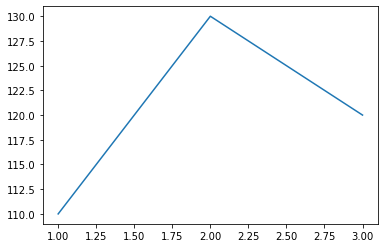

In [53]:
plt.plot([1,2,3],[110,130,120])
# (x좌표, y좌표)

In [113]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

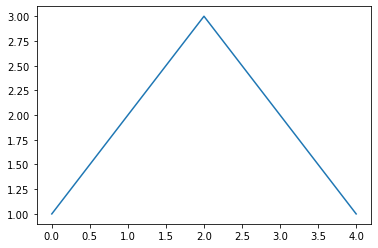

In [123]:
plt.plot([1,2,3,2,1])
plt.show()
 # 파라미터 하나만 넣어줄때, 그 값을 y로 인식하고, x축은 자동생성

In [54]:
# figure 지정 안해도 알아서 가져온다.
x=np.arange(0,12,0.1)
y=np.sin(x)

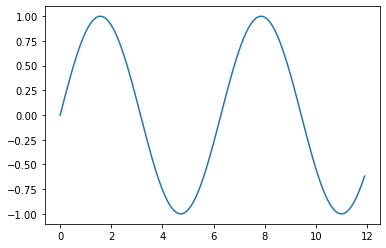

In [130]:
plt.plot(x,y)

Text(0.5, 1.0, 'Title')

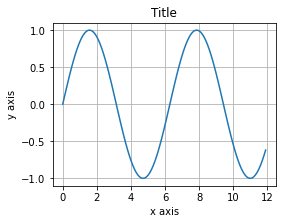

In [137]:
plt.figure(figsize=(4,3))
plt.plot(x,y)
# 그러나 figure 지정 하면 원하는 크기로 만드는 등 커스터마이즈 할수있다.
plt.grid() # 그리드 적용.
plt.xlabel('x axis') # 만약 한글 집어넣으면 깨진다.
plt.ylabel('y axis')
plt.title('Title')

(-1.5, 1.5)

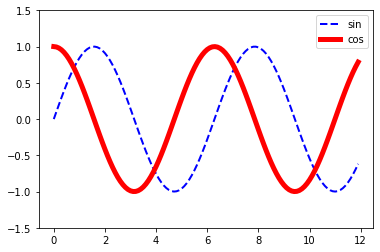

In [55]:
plt.plot(x,y, 'b--', label='sin', lw=2) #lw : line width #b : blue, -- 점선.
plt.plot(x,np.cos(x), 'r', label='cos', lw=5) # 'r'=red 컬러지정
plt.legend() 
# legend 를 찍어주면 label 이 보인다.
plt.ylim(-1.5,1.5) #y limit 으로 그래프 여백을 조절한다.


(0.0, 4.0)

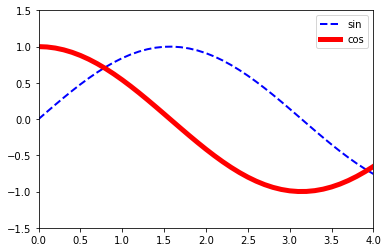

In [56]:
plt.plot(x,y, 'b--', label='sin', lw=2) #lw : line width #b : blue, -- 점선.
plt.plot(x,np.cos(x), 'r', label='cos', lw=5) # 'r'=red 컬러지정
plt.legend() 
# legend 를 찍어주면 label 이 보인다.
plt.ylim(-1.5,1.5) #y limit 으로 그래프 여백을 조절한다.
plt.xlim(0,4) # xlimit 으로 원하는 위치만 잘라 볼수 있다.

## 차트에 스타일 적용

In [59]:
t = np.arange(0,5,0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

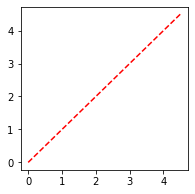

In [60]:
plt.figure(figsize=(3,3))
plt.plot(t,t, 'r--') # 간단한 style 적용 'r--': r= red color, -- 점선, s=사각형

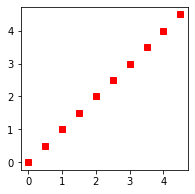

In [174]:
plt.figure(figsize=(3,3))
plt.plot(t,t, 'rs')    # s=사각형, ^ : 삼각형(ex, 'g^': 초록색 삼각형)

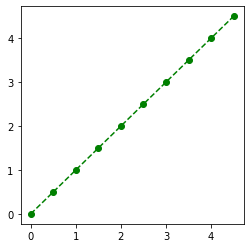

In [177]:
plt.figure(figsize=(4,4))
plt.plot(t,t, color='green', linestyle='dashed', marker='o')
# marker 로 데이터 위치 표시

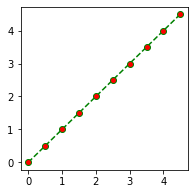

In [181]:
plt.figure(figsize=(3,3))
plt.plot(t,t, color='green', linestyle='dashed', marker='o', markerfacecolor='red')
# markerfacecolor

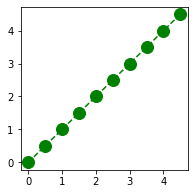

In [180]:
plt.figure(figsize=(3,3))
plt.plot(t,t, color='green', linestyle='dashed', marker='o', markersize=12)

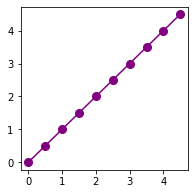

In [186]:
plt.figure(figsize=(3,3))
plt.plot(t,t, color='purple', linestyle='solid', marker='o', markersize=8)

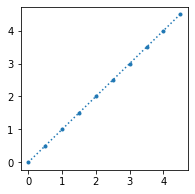

In [61]:
plt.figure(figsize=(3,3))
plt.plot(t,t, 'p:', marker='o', markersize=3) # - : 실선, --: dashed, : :점선, 
# matplotlib.org 사이트를 참고할것!!
# https://matplotlib.org/3.0.3/api/pyplot_summary.html

# 여기부터 9/4

In [64]:
## scatter(산점도)
t = np.array([0,1,2,3,4,5,6,7,8,9])
y =np.array([9,8,7,9,8,3,2,4,3,4])

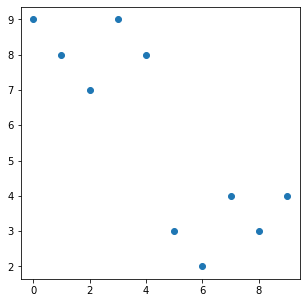

In [65]:
plt.figure(figsize=(5,5))
plt.scatter(t,y)
plt.show()

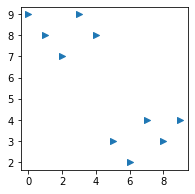

In [68]:
plt.figure(figsize=(3,3))
plt.scatter(t,y, marker='>')
plt.show()

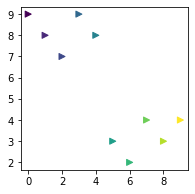

In [70]:
plt.figure(figsize=(3,3))
plt.scatter(t,y, c=t, marker='>') # c : color 값 숫자 리스트로도 넣을 수 있다.
plt.show()

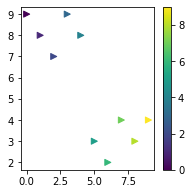

In [71]:
plt.figure(figsize=(3,3))
plt.scatter(t,y, c=t, marker='>') # c : color 값 숫자 리스트로도 넣을 수 있다.
plt.colorbar()              # color 바를 이용해서 값을 참조할수 있다.
plt.show()

In [87]:
# 범례처리
# np.random.normal(): 정해진 값으로 만들어진 정규분포를 따르는 값을 생성
# 정해진 값: 평균과 분산
# 함수의 결과는 ndarray
# normal(): ndarray 생성
# np.random.normal(loc=평균, scale= 분산, size= 개수)
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

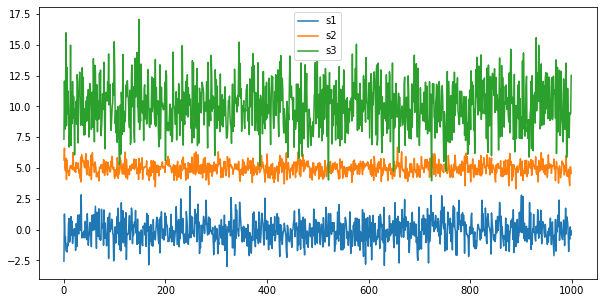

In [92]:
plt.figure(figsize=(10,5))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a18c42cc10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a18c446310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a18c42c8b0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a18c4469d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a18c446cd0>,
 'means': []}

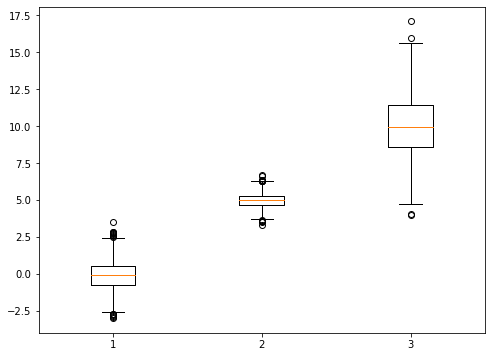

In [94]:
# box plot
plt.figure(figsize=(8,6))
plt.boxplot((s1,s2,s3))

# 9. CCTV와 인구현황 그래프로 분석하기

### 목표 : CCTV 개수와 인구수 비례해서 과한 구와 과소 구를 시각화

In [98]:
# 한글 문제 해결 코드 , 그동안 한글 넣으면 matplotlib에서 깨졌었다.
import platform
from matplotlib import font_manager, rc


In [99]:
import platform as pf
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']= False

if pf.system()== 'Darwin':
    rc('font', family='AppleGothic') # Mac에서 한글 사용 가능
elif pf.system()=='Windows':
    path = 'c:/Windows\Fonts\malgun.ttf'     # 윈도우 한글 글꼴 경로 설정
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('지원하지 않는 운영체제입니다')

Text(0.5, 1.0, '제목')

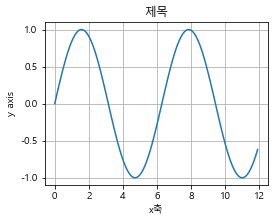

In [102]:
x=np.arange(0,12,0.1)
y=np.sin(x)
plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.grid() 
plt.xlabel('x축') # 이제는 한글을 넣어도 정상 출력된다.
plt.ylabel('y axis')
plt.title('제목')

In [107]:
data_result.head(2)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
1,강동구,773,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05


In [115]:
data_result.set_index('구별', inplace=True)

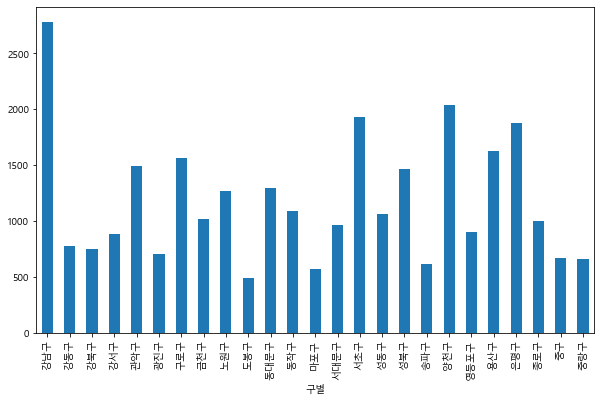

In [116]:
# CCTV 현황 시각화
plt.figure()
data_result['소계'].plot(kind = 'bar', figsize=(10,6))       
# Series 가 가지고 있는 plot() 로 그리기.
# plt.plot() 은 라인플랏을 의미하고, 시리즈의 plot()과 다르므로 잘 구별해서 사용.
# Pandas의 DataFrame은 plot 을 자체적으로 실행할수 없고 matplotlib.pyplot 로 권한을 위임함.
# 즉 matplotlib 없이는 DF로 플랏 못그림.

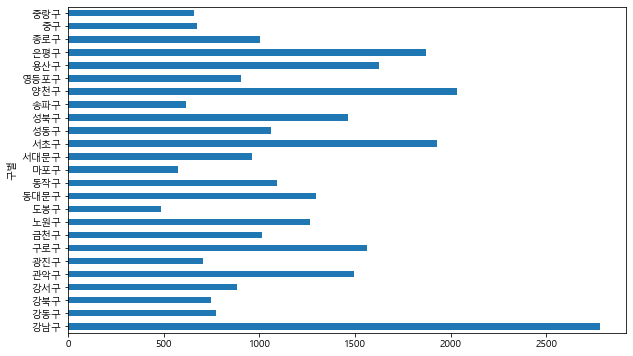

In [123]:
plt.figure()
data_result['소계'].plot(kind = 'barh', figsize=(10,6))
plt.show()

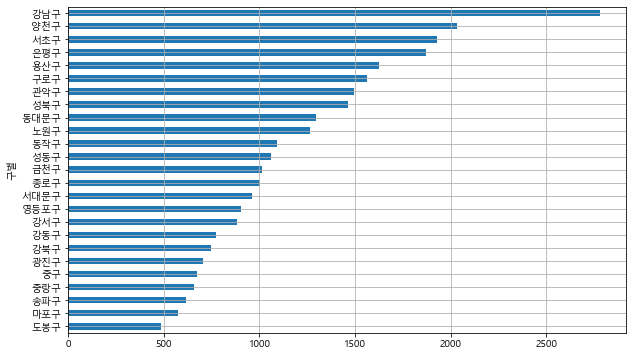

In [128]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,6))
plt.show()

In [129]:
# 새 컬럼 생성
data_result['CCTV비율']= data_result['소계']/data_result['인구수']*100

In [132]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,0.487292


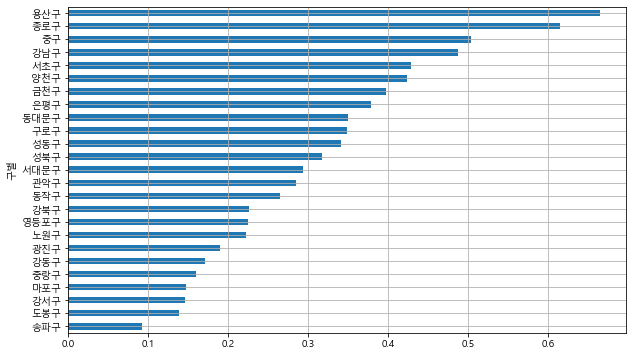

In [134]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,6))
plt.show()

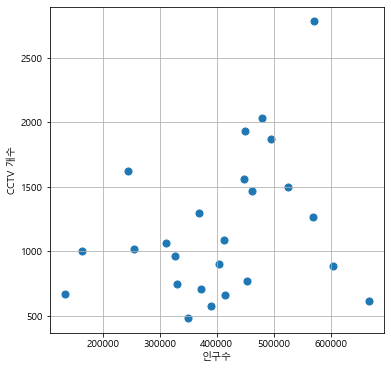

In [136]:
plt.figure(figsize=(6,6))
plt.scatter(
    data_result['인구수']
    , data_result['소계']
    , s=50
)
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

In [142]:
# numpy.polyfit() : 지정한 차수의 다항식 계수 찾아서 적용.
# 1차식 :(y= ax + b 에서 계수 a,b 찾기
# numpy.poly1d() : 식을 만드는 함수
# y(소계) = a * X(인구수) + b
# fp1 = np.polyfit( x값, y값, 차수)
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [144]:
# 위의 계수로 식 생성
f1 = np.poly1d(fp1)
f1

poly1d([1.30916415e-03, 6.45066497e+02])

In [145]:
print(data_result['인구수'].min())
print(data_result['인구수'].max())

133240.0
667483.0


In [150]:
# fx = np.linspace(시작값, 끝값(종가), 나눌 구간 지정-)
fx=np.linspace(100000,700000,100)

In [147]:
np.linspace(0,10,10) # 나눌구간 : 즉 tick 의 개수를 의미하는 듯.

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수']
           ,data_result['소계']
            , s = 50  # 점의 크기
           )
plt.plot(
    fx     # x 축값(인구수)
    , f1(fx)  #y 축값(cctv 개수 -> 보편적 개수)
    , ls='dashed' #ls = line style
    , lw =3   # lw =line width
    , color = 'g'
)

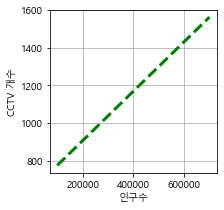

In [158]:
# 위 polyfit 으로 얻어낸 f1식에 fx를 대입해서, y=ax+b 형태의 추세선을 그리기.
plt.figure(figsize=(3,3))
plt.plot(
    fx     # x 축값
    , f1(fx)  #y 축값(cctv 개수 -> 보편적 개수)
    , ls='dashed' #ls = line style
    , lw =3   # lw =line width
    , color = 'g'
)
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

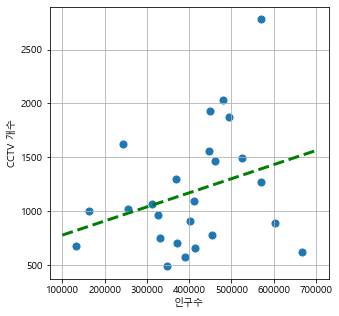

In [157]:
# 스캐터와 합치기
plt.figure(figsize=(5,5))
plt.scatter(
    data_result['인구수']
    , data_result['소계']
    , s=50
)
plt.plot(
    fx     # x 축값
    , f1(fx)  #y 축값(cctv 개수 -> 보편적 개수)
    , ls='dashed' #ls = line style
    , lw =3   # lw =line width
    , color = 'g'
)
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

In [165]:
# 과다한 애 상위 5개와, 부족한애 하위 5개를 찾겠다.
# 추세선 기준 오차가 큰 애들을 찾겠다.
# 절대값 : abs() -> 내장함수-> 루프로 돌려야함, np.abs()로 하면 브로드캐스팅
data_result['오차'] = round(np.abs(data_result['소계']-f1(data_result['인구수'])),1) # 추세선과의 실제값 차이를 절대값으로 출력

In [221]:
df_sort= data_result.sort_values(by='오차', ascending=False)
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,0.487292,1388.1
송파구,618,104.35,667483.0,660584.0,6899.0,72506.0,1.03,10.86,0.092587,900.9
양천구,2034,34.67,479978.0,475949.0,4029.0,52975.0,0.84,11.04,0.423769,760.6
서초구,1930,63.37,450310.0,445994.0,4316.0,51733.0,0.96,11.49,0.428594,695.4
용산구,1624,53.22,244203.0,229456.0,14747.0,36231.0,6.04,14.84,0.665020,659.2
도봉구,485,246.64,348646.0,346629.0,2017.0,51312.0,0.58,14.72,0.139110,616.5
마포구,574,212.10,389649.0,378566.0,11083.0,48765.0,2.84,12.52,0.147312,581.2
은평구,1873,85.24,494388.0,489943.0,4445.0,72334.0,0.90,14.63,0.378852,580.7
강서구,884,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02,0.146413,551.5


In [179]:
df_sort_d= data_result.sort_values(by='오차', ascending=False).head(5)
df_sort_d

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,0.487292,1388.1
송파구,618,104.35,667483.0,660584.0,6899.0,72506.0,1.03,10.86,0.092587,900.9
양천구,2034,34.67,479978.0,475949.0,4029.0,52975.0,0.84,11.04,0.423769,760.6
서초구,1930,63.37,450310.0,445994.0,4316.0,51733.0,0.96,11.49,0.428594,695.4
용산구,1624,53.22,244203.0,229456.0,14747.0,36231.0,6.04,14.84,0.665020,659.2


In [181]:
df_sort.tail(5) 
# 뒤에서 다섯개. 즉 asending 으로 정렬후 tail 때리면, 하위 볼수 있으니까 굳이 desc 안해줘도 됨

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
성동구,1062,81.78,311244.0,303380.0,7864.0,39997.0,2.53,12.85,0.341211,9.5
금천구,1015,100.00,255082.0,236353.0,18729.0,32970.0,7.34,12.93,0.397911,36.0
동작구,1091,139.34,412520.0,400456.0,12064.0,56013.0,2.92,13.58,0.264472,94.1
서대문구,962,48.58,327163.0,314982.0,12181.0,48161.0,3.72,14.72,0.294043,111.4
노원구,1265,188.93,569384.0,565565.0,3819.0,71941.0,0.67,12.63,0.222170,125.5


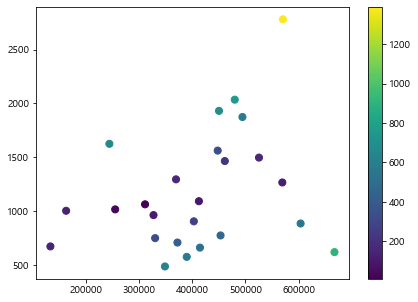

In [196]:
colormap= data_result['오차'] # colormap으로 보기 쉽게 시각화
plt.figure(figsize=(7,5))
plt.scatter(data_result['인구수'],data_result['소계']
           ,c=data_result['오차']  # color 에 시리즈를 입력해서 값에 따라 다른 컬러를 갖는 컬러맵을 갖게함
            ,s = 50)
plt.colorbar()
plt.show()

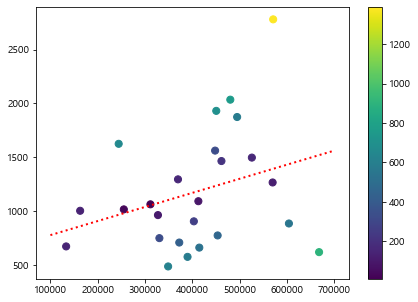

In [200]:
colormap= data_result['오차'] # colormap으로 보기 쉽게 시각화
plt.figure(figsize=(7,5))
plt.scatter(data_result['인구수'],data_result['소계']
           ,c=data_result['오차']  # color 에 시리즈를 입력해서 값에 따라 다른 컬러를 갖는 컬러맵을 갖게함
            ,s = 50)
plt.plot(
    fx
    ,f1(fx)
    ,ls=':', lw=2, color='r'

)
plt.colorbar()
plt.show()

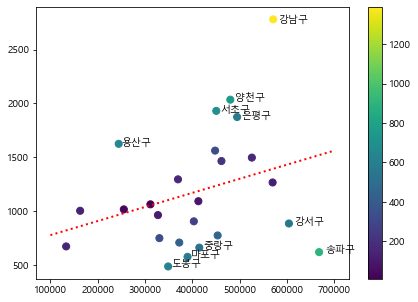

In [230]:
colormap= data_result['오차'] # colormap으로 보기 쉽게 시각화
plt.figure(figsize=(7,5))
plt.scatter(data_result['인구수'],data_result['소계']
           ,c=data_result['오차']  # color 에 시리즈를 입력해서 값에 따라 다른 컬러를 갖는 컬러맵을 갖게함
            ,s = 50)
plt.plot(
    fx
    ,f1(fx)
    ,ls=':', lw=2, color='r'

)
# 상위 10개 구의 구이름 문자로 출력
# 차트에 문자 출력 함수 : plt.text()
# plt. text(x축 위치값, y축 위치값, 출력할 문자열, fontsize)
for n in range(10): # 10개구 출력하도록 10번 반복
    plt.text(df_sort['인구수'][n] *1.02 # x축 문자위치값 조정가능.
    , df_sort['소계'][n] * 0.99       # y축 문자 위치값
    , df_sort.index[n]
    , fontsize=10
            )
plt.colorbar()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
성동구,1062,81.78,311244.0,303380.0,7864.0,39997.0,2.53,12.85,0.341211,9.5
금천구,1015,100.00,255082.0,236353.0,18729.0,32970.0,7.34,12.93,0.397911,36.0
동작구,1091,139.34,412520.0,400456.0,12064.0,56013.0,2.92,13.58,0.264472,94.1
서대문구,962,48.58,327163.0,314982.0,12181.0,48161.0,3.72,14.72,0.294043,111.4
노원구,1265,188.93,569384.0,565565.0,3819.0,71941.0,0.67,12.63,0.222170,125.5
